<a href="https://colab.research.google.com/github/delawrencjes/datascience/blob/main/ParallelComputing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of unique weeks: 53

Average population staying at home per week:
Week
0.0     1.204752e+05
1.0     1.511653e+05
2.0     1.495038e+05
3.0     1.468154e+05
4.0     1.467504e+05
5.0     1.449985e+05
6.0     1.436682e+05
7.0     1.469490e+05
8.0     1.391244e+05
9.0     1.389168e+05
10.0    1.393175e+05
11.0    1.542455e+05
12.0    1.569134e+05
13.0    1.590891e+05
14.0    1.591531e+05
15.0    1.607076e+05
16.0    1.552874e+05
17.0    2.736752e+05
18.0    2.847053e+06
19.0    2.736106e+06
20.0    2.590573e+06
21.0    2.749411e+06
22.0    2.720680e+06
23.0    1.488751e+05
24.0    1.506328e+05
25.0    1.892373e+06
26.0    2.794153e+06
27.0    2.736764e+06
28.0    2.749960e+06
29.0    2.856128e+06
30.0    2.821288e+06
31.0    2.769023e+06
32.0    2.634113e+06
33.0    2.628524e+06
34.0    2.744077e+06
35.0    2.835383e+06
36.0    2.864273e+06
37.0    2.847177e+06
38.0    2.814431e+06
39.0    2.838379e+06
40.0    2.880286e+06
41.0    2.853042e+06
42.0    2.863305e+06
43.0    2.901966e+0

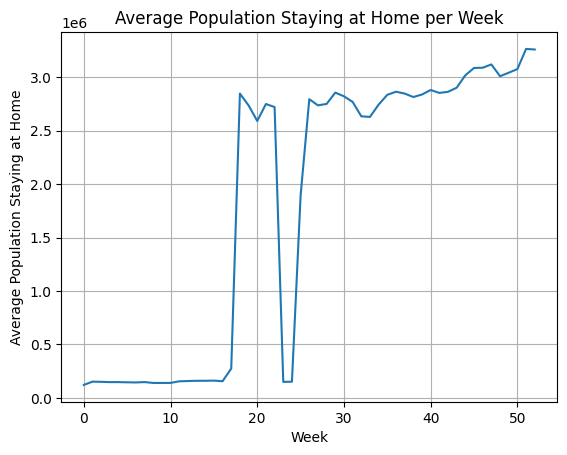

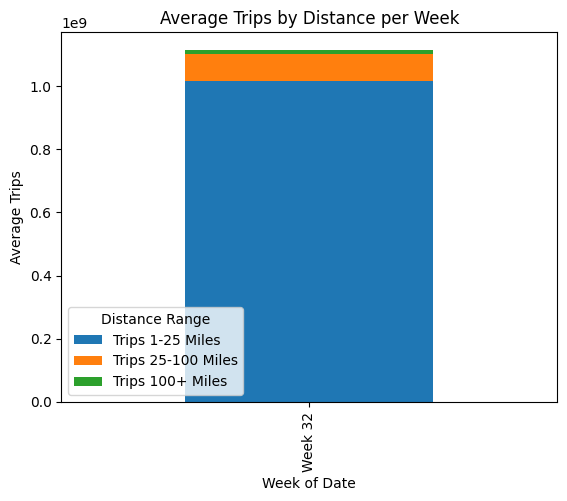

In [ ]:
import pandas as pd
import time

# Load data
df_trips_by_distance = pd.read_csv("Trips_by_distance.csv")
df_trips_full = pd.read_csv("Trips_full_data.csv")

# --- TASK 1A (Sequential) ---

# Part 1: How many people are staying at home?
start_time = time.time()
weeks_count = df_trips_by_distance['Week'].nunique()
print(f"Number of unique weeks: {weeks_count}")

avg_stay_home_by_week = df_trips_by_distance.groupby('Week')['Population Staying at Home'].mean()
print("\nAverage population staying at home per week:")
print(avg_stay_home_by_week)

seq_time_1a = time.time() - start_time
print(f"\nSequential processing time (Stay Home): {seq_time_1a:.2f} seconds")

# Part 2: How far are people traveling when they don't stay home?
start_time = time.time()
avg_trips_by_distance = df_trips_full.groupby('Week of Date')[[
    'Trips 1-25 Miles', 'Trips 25-100 Miles', 'Trips 100+ Miles'
]].mean()
print("\nAverage trips by distance per week:")
print(avg_trips_by_distance)

avg_people_by_distance = df_trips_full.groupby('Week of Date')[
    'People Not Staying at Home'
].mean()
print("\nAverage people not staying at home per week:")
print(avg_people_by_distance)

seq_time_1a_2 = time.time() - start_time
print(f"\nSequential processing time (Trip Distance): {seq_time_1a_2:.2f} seconds")

# Visualization for Part 1: Average Population Staying at Home per Week
plt.plot(avg_stay_home_by_week.index, avg_stay_home_by_week.values)
plt.xlabel('Week')
plt.ylabel('Average Population Staying at Home')
plt.title('Average Population Staying at Home per Week')
plt.grid(True)
plt.show()

# Visualization for Part 2: Average Trips by Distance per Week
avg_trips_by_distance.plot(kind='bar', stacked=True)
plt.xlabel('Week of Date')
plt.ylabel('Average Trips')
plt.title('Average Trips by Distance per Week')
plt.legend(title='Distance Range')
plt.show()

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:35921
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:33285/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:43647'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:35715'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:38731 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:38731
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:53044
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:46365 name: 1
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:46365
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:53052
INFO:distributed.scheduler:Receive client connection: Client-8db3d4f3-1bc4-11f0-81f4-0242ac1c000c
INFO:distributed.core:Starting establis


[Processors: 2] Avg Stay Home Time: 11.30 seconds


INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:33711'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:32795'


[Processors: 2] Avg Trips Time: 0.25 seconds


INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:34775 name: 2
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:34775
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:52702
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:41575 name: 3
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:41575
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:52712



[Processors: 4] Avg Stay Home Time: 0.75 seconds


INFO:distributed.scheduler:Remove client Client-8db3d4f3-1bc4-11f0-81f4-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:53074; closing.
INFO:distributed.scheduler:Remove client Client-8db3d4f3-1bc4-11f0-81f4-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-8db3d4f3-1bc4-11f0-81f4-0242ac1c000c
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1744919161.9903502') (0, 1, 2, 3)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:43647'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:35715'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:33711'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:32795'

[Processors: 4] Avg Trips Time: 0.45 seconds


INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:46365 name: 1 (stimulus_id='handle-worker-cleanup-1744919162.1177135')
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:52712; closing.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:41575 name: 3 (stimulus_id='handle-worker-cleanup-1744919162.1480138')
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:52702; closing.
INFO:distributed.batched:Batched Comm Closed <TCP (closed) Scheduler connection to worker local=tcp://127.0.0.1:35921 remote=tcp://127.0.0.1:52712>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/distributed/batched.py", line 115, in _background_send
    nbytes = yield coro
             ^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 766, in run
    value = future.result()
            ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/distributed/comm/tcp.py", line 262, in write
 

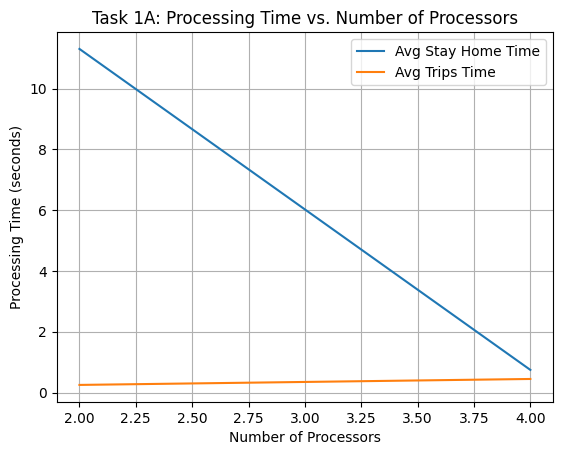

In [ ]:
import dask.dataframe as dd
from dask.distributed import Client, LocalCluster
import matplotlib.pyplot as plt
import time

# Setup Dask cluster
n_processors = [2, 4]
n_processors_time_1a = {}
n_processors_time_1a_2 = {}

cluster = LocalCluster(n_workers=n_processors[0], threads_per_worker=1, memory_limit='1GB')
client = Client(cluster)

# Dtypes (common types for both datasets)
# Changed 'Week' and 'Month' to object to handle potential mixed types and missing values
dtype_common = {
    'County Name': 'object',
    'State Postal Code': 'object',
    'Week': 'object', # Changed to object
    'Population Staying at Home': 'float64',
    'Population Not Staying at Home': 'float64',
    'Number of Trips': 'float64',
    'Number of Trips <1': 'float64',
    'Number of Trips 1-3': 'float64',
    'Number of Trips 3-5': 'float64',
    'Number of Trips 5-10': 'float64',
    'Number of Trips 10-25': 'float64',
    'Number of Trips 25-50': 'float64',
    'Number of Trips 50-100': 'float64',
    'Number of Trips 100-250': 'float64',
    'Number of Trips 250-500': 'float64',
    'Number of Trips >=500': 'float64',
    'Month': 'object'  # Changed to object
}

ddf_trips_by_distance = dd.read_csv("Trips_by_distance.csv", dtype=dtype_common).persist()

# Changed 'Week of Date' and 'Month' to object to handle potential mixed types and missing values
ddf_trips_full = dd.read_csv("Trips_full_data.csv", dtype={
    'Week of Date': 'object', # Changed to object
    'Trips 1-25 Miles': 'float64',
    'Trips 25-100 Miles': 'float64',
    'Trips 100+ Miles': 'float64',
    'People Not Staying at Home': 'float64',
    'Month': 'object'  # Changed to object
}).persist()

# Run parallel tasks
for processor in n_processors:
    cluster.scale(processor)
    client.wait_for_workers(processor)

    # Part 1: Avg. Population Staying at Home
    start_time = time.time()
    # Convert 'Week' to numeric if needed after handling missing values
    weeks_count = ddf_trips_by_distance['Week'].nunique().compute()
    avg_stay_home_by_week = ddf_trips_by_distance.groupby('Week')['Population Staying at Home'].mean().compute()
    n_processors_time_1a[processor] = time.time() - start_time
    print(f"\n[Processors: {processor}] Avg Stay Home Time: {n_processors_time_1a[processor]:.2f} seconds")

    # Part 2: Avg. Trips by Distance
    start_time = time.time()
    # Convert 'Week of Date' to numeric if needed after handling missing values
    avg_trips_by_distance = ddf_trips_full.groupby('Week of Date')[
        'Trips 1-25 Miles', 'Trips 25-100 Miles', 'Trips 100+ Miles'
    ].mean().compute()

    avg_people_by_distance = ddf_trips_full.groupby('Week of Date')[
        'People Not Staying at Home'
    ].mean().compute()

    n_processors_time_1a_2[processor] = time.time() - start_time
    print(f"[Processors: {processor}] Avg Trips Time: {n_processors_time_1a_2[processor]:.2f} seconds")

# Close Dask
client.close()
cluster.close()

# Visualization: Speedup with increasing processors
plt.plot(n_processors, list(n_processors_time_1a.values()), label='Avg Stay Home Time')
plt.plot(n_processors, list(n_processors_time_1a_2.values()), label='Avg Trips Time')
plt.xlabel('Number of Processors')
plt.ylabel('Processing Time (seconds)')
plt.title('Task 1A: Processing Time vs. Number of Processors')
plt.legend()
plt.grid(True)
plt.show()

Dates with >10M people making 10–25 mile trips: 901
Dates with >10M people making 50–100 mile trips: 900

Sequential processing time: 0.04 seconds


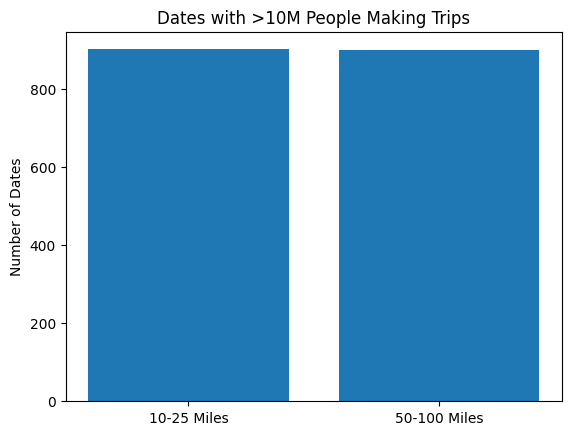

In [ ]:
import pandas as pd
import time


# Strip column names to avoid extra spaces
df_trips_by_distance.columns = df_trips_by_distance.columns.str.strip()

# Start timer
start_time = time.time()

# Filter for >10M people making 10–25 mile trips
trips_10_25_filtered = df_trips_by_distance[df_trips_by_distance['Number of Trips 10-25'] > 10_000_000]
dates_10_25 = trips_10_25_filtered['Date'].unique()

# Filter for >10M people making 50–100 mile trips
trips_50_100_filtered = df_trips_by_distance[df_trips_by_distance['Number of Trips 50-100'] > 10_000_000]
dates_50_100 = trips_50_100_filtered['Date'].unique()

# Results
print(f"Dates with >10M people making 10–25 mile trips: {len(dates_10_25)}")
print(f"Dates with >10M people making 50–100 mile trips: {len(dates_50_100)}")

seq_time_1b = time.time() - start_time
print(f"\nSequential processing time: {seq_time_1b:.2f} seconds")

# Visualization: Dates exceeding 10M trips
plt.bar(['10-25 Miles', '50-100 Miles'], [len(dates_10_25), len(dates_50_100)])
plt.ylabel('Number of Dates')
plt.title('Dates with >10M People Making Trips')
plt.show()

INFO:distributed.scheduler:State start



Running Task 1B with 2 processors...


INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:36201
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:40335/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:42429'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:38125'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:46441 name: 1
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:46441
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:43990
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:37467 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:37467
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:44002
INFO:distributed.scheduler:Receive client connection: Client-c4fa0fda-1bc4-11f0-81f4-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:44008

Dask processing time: 10.08 seconds


INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:42429' closed.
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:38125' closed.
INFO:distributed.scheduler:Closing scheduler. Reason: unknown
INFO:distributed.scheduler:Scheduler closing all comms
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:44363
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:38371/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:45293'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:44945'



Running Task 1B with 4 processors...


INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:37683'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:46213'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:34049 name: 3
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:34049
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:43216
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:36281 name: 2
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:36281
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:43218
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:38017 name: 1
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:38017
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:43220
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:45681 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp

Dask processing time: 11.55 seconds


INFO:distributed.batched:Batched Comm Closed <TCP (closed) Scheduler connection to worker local=tcp://127.0.0.1:44363 remote=tcp://127.0.0.1:43216>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/distributed/batched.py", line 115, in _background_send
    nbytes = yield coro
             ^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 766, in run
    value = future.result()
            ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/distributed/comm/tcp.py", line 262, in write
    raise CommClosedError()
distributed.comm.core.CommClosedError
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:45293' closed.
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:44945' closed.
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:46213' closed.
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:37683' closed.
INFO:distributed.scheduler:Closing scheduler. Reason: unknown
INFO:distributed.scheduler:Scheduler closing all co

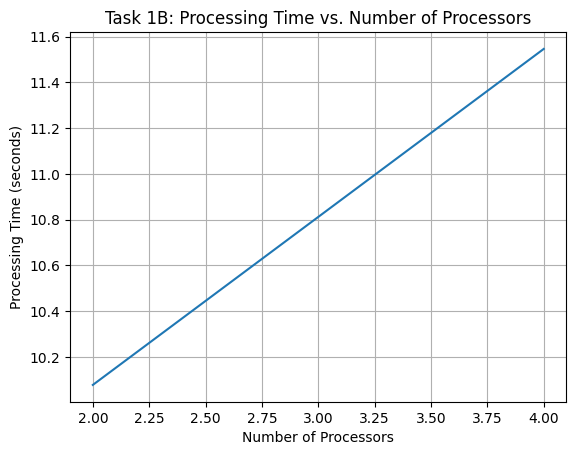

In [ ]:
import dask.dataframe as dd
from dask.distributed import Client, LocalCluster
import time

# Define processor counts and time storage
n_processors = [2, 4]
n_processors_time_1b = {}

# Define dtypes for faster reading
# Include all columns and their correct data types
dtypes = {
    'Date': 'object',
    'County Name': 'object',
    'State Postal Code': 'object',
    'Number of Trips': 'float64',
    'Number of Trips <1': 'float64',
    'Number of Trips 1-3': 'float64',
    'Number of Trips 3-5': 'float64',
    'Number of Trips 5-10': 'float64',
    'Number of Trips 10-25': 'float64',
    'Number of Trips 25-50': 'float64',
    'Number of Trips 50-100': 'float64',
    'Number of Trips 100-250': 'float64',
    'Number of Trips 250-500': 'float64',
    'Number of Trips >=500': 'float64',
    'Population Staying at Home': 'float64',
    'Population Not Staying at Home': 'float64',
    'Month': 'float64', # Or 'int64' if appropriate
    'Week': 'float64'   # Or 'int64' if appropriate
    # ... add other columns and their types
}

# Loop over processor configurations
for processor in n_processors:
    print(f"\nRunning Task 1B with {processor} processors...")

    cluster = LocalCluster(n_workers=processor, threads_per_worker=1, memory_limit='1GB')
    client = Client(cluster)

    # Read and strip column names
    ddf = dd.read_csv("Trips_by_distance.csv", dtype=dtypes).persist()
    # Specify dtypes to avoid inference errors
    ddf.columns = ddf.columns.str.strip()

    # Start timing
    start_time = time.time()

    # 10–25 mile trips > 10 million
    trips_10_25_filtered = ddf[ddf['Number of Trips 10-25'] > 10_000_000]
    dates_10_25 = trips_10_25_filtered['Date'].unique().compute()

    # 50–100 mile trips > 10 million
    trips_50_100_filtered = ddf[ddf['Number of Trips 50-100'] > 10_000_000]
    dates_50_100 = trips_50_100_filtered['Date'].unique().compute()

    # Record time
    dask_time = time.time() - start_time
    n_processors_time_1b[processor] = dask_time
    print(f"Dask processing time: {dask_time:.2f} seconds")

    # Cleanup
    client.close()
    cluster.close()

# Visualization: Speedup with increasing processors
plt.plot(n_processors, list(n_processors_time_1b.values()))
plt.xlabel('Number of Processors')
plt.ylabel('Processing Time (seconds)')
plt.title('Task 1B: Processing Time vs. Number of Processors')
plt.grid(True)
plt.show()

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:38359
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:39989/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:Worker process 58769 exited with status 1
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:33703'. Reason: nanny-close-gracefully
INFO:distributed.nanny:Worker process 53127 exited with status 1
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:41145'. Reason: nanny-close-gracefully
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:33703' closed.
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:34115'
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:41145' closed.
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:39973'
INFO:distributed.nanny:Worker process 57070 exited with status 1
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:35313'. Reason: nanny-close-gracefully
INFO

<Client: 'tcp://127.0.0.1:38359' processes=2 threads=2, memory=3.73 GiB>


INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:35591 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:35591
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:50538
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:34087 name: 1
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:34087
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:50548


Pandas data loading time: 9.73 seconds


INFO:distributed.scheduler:Remove client Client-4837872e-1bc4-11f0-81f4-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:47036; closing.
INFO:distributed.scheduler:Remove client Client-4837872e-1bc4-11f0-81f4-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-4837872e-1bc4-11f0-81f4-0242ac1c000c
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1744919048.152883') (0, 1)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:34115'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:39973'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:47034; closing.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:40207 name: 0 (stimulus_id='handle-worker-cleanup-1744919048.1929483')
INFO:distri

Dask data loading time (2 workers): 9.53 seconds


INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:34115' closed.
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:39973' closed.
INFO:distributed.scheduler:Closing scheduler. Reason: unknown
INFO:distributed.scheduler:Scheduler closing all comms



--- Comparison ---
Pandas: 9.73 sec
Dask (2 workers): 9.53 sec


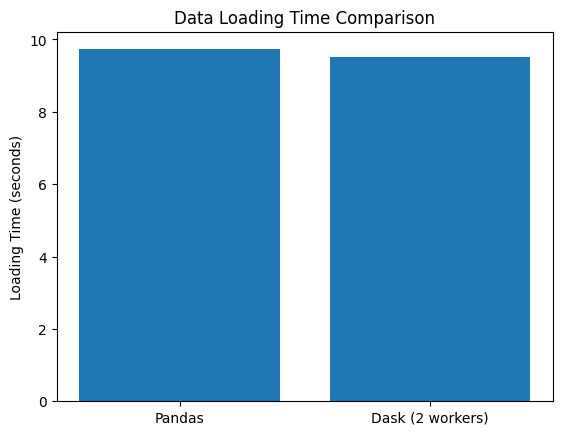

In [ ]:
# Imports
import pandas as pd
import dask.dataframe as dd
import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Dask setup for 2-core CPU (Colab free)
from dask.distributed import Client, LocalCluster

cluster = LocalCluster(n_workers=2, threads_per_worker=1, memory_limit='2GB')
client = Client(cluster)
print(client)

# Measure Pandas load time
start_time_pd = time.time()
df_trips_by_distance = pd.read_csv('Trips_by_distance.csv')
df_trips_full = pd.read_csv('Trips_full_data.csv')
pd_load_time = time.time() - start_time_pd
print(f"Pandas data loading time: {pd_load_time:.2f} seconds")

# Dask loading (optimized)
start_time_dask = time.time()
dtypes = {
    'County Name': 'object',
    'Number of Trips': 'float64',
    'Number of Trips 1-3': 'float64',
    'Number of Trips 10-25': 'float64',
    'Number of Trips 100-250': 'float64',
    'Number of Trips 25-50': 'float64',
    'Number of Trips 250-500': 'float64',
    'Number of Trips 3-5': 'float64',
    'Number of Trips 5-10': 'float64',
    'Number of Trips 50-100': 'float64',
    'Number of Trips <1': 'float64',
    'Number of Trips >=500': 'float64',
    'Population Not Staying at Home': 'float64',
    'Population Staying at Home': 'float64',
    'State Postal Code': 'object',
    'Month': 'float64',
    'Week': 'float64',
}

# Read with larger block size for efficiency
ddf_trips_by_distance = dd.read_csv('Trips_by_distance.csv', dtype=dtypes, blocksize='64MB').persist()
ddf_trips_full = dd.read_csv('Trips_full_data.csv', dtype=dtypes, blocksize='64MB').persist()

# Trigger computation
_ = ddf_trips_by_distance.head()
_ = ddf_trips_full.head()
dask_load_time = time.time() - start_time_dask
print(f"Dask data loading time (2 workers): {dask_load_time:.2f} seconds")

# Shut down
client.close()
cluster.close()

# Comparison
print("\n--- Comparison ---")
print(f"Pandas: {pd_load_time:.2f} sec")
print(f"Dask (2 workers): {dask_load_time:.2f} sec")

# Visualization: Loading Time Comparison
plt.bar(['Pandas', 'Dask (2 workers)'], [pd_load_time, dask_load_time])
plt.ylabel('Loading Time (seconds)')
plt.title('Data Loading Time Comparison')
plt.show()

In [ ]:
  # Task 1D: Optimize Travel Frequency Model (Sequential)
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

start_time = time.time()

# --- Data Preprocessing ---
# 1. Extract week number from 'Week of Date' in df_trips_full
# Instead of splitting, extract week number using a regular expression
df_trips_full['Week'] = df_trips_full['Week of Date'].str.extract(r'(\d+)$').astype(int)

# 2. Merge the two DataFrames on 'Week' and relevant county/state information
# Assuming there are columns like 'County Name' and 'State Postal Code' for merging
model_data = pd.merge(df_trips_by_distance, df_trips_full[['Week', 'Trips 1-25 Miles', 'Trips 25-100 Miles']],
                     on='Week', how='inner')

# 3. Filter for week 32
week_32_data = model_data[model_data['Week'] == 32]

# 4. Handle missing values (e.g., imputation or removal)
week_32_data.dropna(subset=['Trips 1-25 Miles', 'Trips 25-100 Miles', 'Number of Trips 10-25'], inplace=True)

# --- Machine Learning ---
# Prepare data for the model
X = week_32_data[['Trips 1-25 Miles', 'Trips 25-100 Miles']]
y = week_32_data['Number of Trips 10-25']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

seq_time_1d = time.time() - start_time
print(f"Sequential processing time: {seq_time_1d:.2f} seconds")

Model coefficients: [ 0.02364607 -0.31140186]
Model intercept: 10448937.571159974
Mean Squared Error: 921011653103188.8
R² Score: -0.006476903697749226
Sequential processing time: 1.33 seconds


In [ ]:
# Task 1D: Optimize Travel Frequency Model (Parallel using Dask)

import dask.dataframe as dd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import time

start_time = time.time()

# --- Step 1: Define dtypes to avoid mismatched dtype issues ---
trips_by_distance_dtype = {
    'County Name': 'object',
    'Month': 'float64',
    'Number of Trips': 'float64',
    'Number of Trips 1-3': 'float64',
    'Number of Trips 10-25': 'float64',
    'Number of Trips 100-250': 'float64',
    'Number of Trips 25-50': 'float64',
    'Number of Trips 250-500': 'float64',
    'Number of Trips 3-5': 'float64',
    'Number of Trips 5-10': 'float64',
    'Number of Trips 50-100': 'float64',
    'Number of Trips <1': 'float64',
    'Number of Trips >=500': 'float64',
    'Population Not Staying at Home': 'float64',
    'Population Staying at Home': 'float64',
    'State Postal Code': 'object',
    'Week': 'float64'
}

trips_full_dtype = {
    'Week of Date': 'object',
    'Trips 1-25 Miles': 'float64',
    'Trips 25-100 Miles': 'float64'
}

# --- Step 2: Load Dask DataFrames with dtypes ---
ddf_trips_by_distance = dd.read_csv("Trips_by_distance.csv", dtype=trips_by_distance_dtype)
ddf_trips_full = dd.read_csv("Trips_full_data.csv", dtype=trips_full_dtype)

# --- Step 3: Extract Week number from "Week of Date" ---
week_series = ddf_trips_full['Week of Date'].str.extract(r'(\d+)$')[0].astype(float)
ddf_trips_full = ddf_trips_full.assign(Week=week_series)

# ddf_trips_full['Week'] = ddf_trips_full['Week of Date'].str.extract(r'(\d+)$').astype(float)

# --- Step 4: Select necessary columns to avoid large memory loads ---
ddf_trips_full_trimmed = ddf_trips_full[['Week', 'Trips 1-25 Miles', 'Trips 25-100 Miles']]
ddf_trips_by_distance_trimmed = ddf_trips_by_distance[['Week', 'Number of Trips 10-25']]

# --- Step 5: Merge on 'Week' ---
ddf_merged = ddf_trips_by_distance.merge(ddf_trips_full_trimmed, on='Week', how='inner')

# --- Step 6: Filter for Week 32 ---
ddf_week_32 = ddf_merged[ddf_merged['Week'] == 32.0]

# --- Step 7: Drop rows with missing values ---
ddf_week_32_cleaned = ddf_week_32.dropna(subset=['Trips 1-25 Miles', 'Trips 25-100 Miles', 'Number of Trips 10-25'])

# --- Step 8: Compute the cleaned Dask DataFrame to get a pandas DataFrame ---
df_week_32 = ddf_week_32_cleaned.compute()

# --- Step 9: Train ML model (same as your sequential code) ---
X = df_week_32[['Trips 1-25 Miles', 'Trips 25-100 Miles']]
y = df_week_32['Number of Trips 10-25']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

parallel_time_1d = time.time() - start_time
print(f"Parallel (Dask) processing time: {parallel_time_1d:.2f} seconds")


INFO:distributed.core:Event loop was unresponsive in Scheduler for 8.94s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 9.07s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 9.13s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 9.18s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 9.19s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause tim

Model coefficients: [ 0.02364607 -0.31140186]
Model intercept: 10448937.571159974
Mean Squared Error: 921011653103188.8
R² Score: -0.006476903697749226
Parallel (Dask) processing time: 105.28 seconds
